In [ ]:
def create_table3(tb1, tb2):
    table3 = pd.DataFrame(columns=['CustomerNum'])
    i = 0
    j = 0
    while i < len(tb1) and j < len(tb2):
        for k in range(3):
            if i < len(tb1):
                table3 = table3.append({'CustomerNum': tb1.iloc[i]['CustomerNum']}, ignore_index=True)
                i += 1
        for k in range(4):
            if j < len(tb2):
                table3 = table3.append({'CustomerNum': tb1.iloc[j]['CustomerNum']}, ignore_index=True)
                j+=1
    return table3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
weather_df = pd.read_csv(r'C:\Datasets\weather_data.csv',na_values=' ')

In [3]:
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
5994,2006-05-15 19:00:00.000 +0200,Partly Cloudy,rain,19.094444,19.094444,0.60,6.9391,350,11.2056,0,1020.07,Partly cloudy until night.
5995,2006-05-15 20:00:00.000 +0200,Partly Cloudy,rain,17.655556,17.655556,0.62,1.6100,56,10.3523,0,1020.44,Partly cloudy until night.
5996,2006-05-15 21:00:00.000 +0200,Partly Cloudy,rain,15.072222,15.072222,0.78,1.9481,170,9.9820,0,1020.99,Partly cloudy until night.
5997,2006-05-15 22:00:00.000 +0200,Partly Cloudy,rain,13.405556,13.405556,0.83,3.1073,201,15.8263,0,1021.50,Partly cloudy until night.


In [4]:
weather_df.shape

(5999, 12)

In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


<AxesSubplot:>

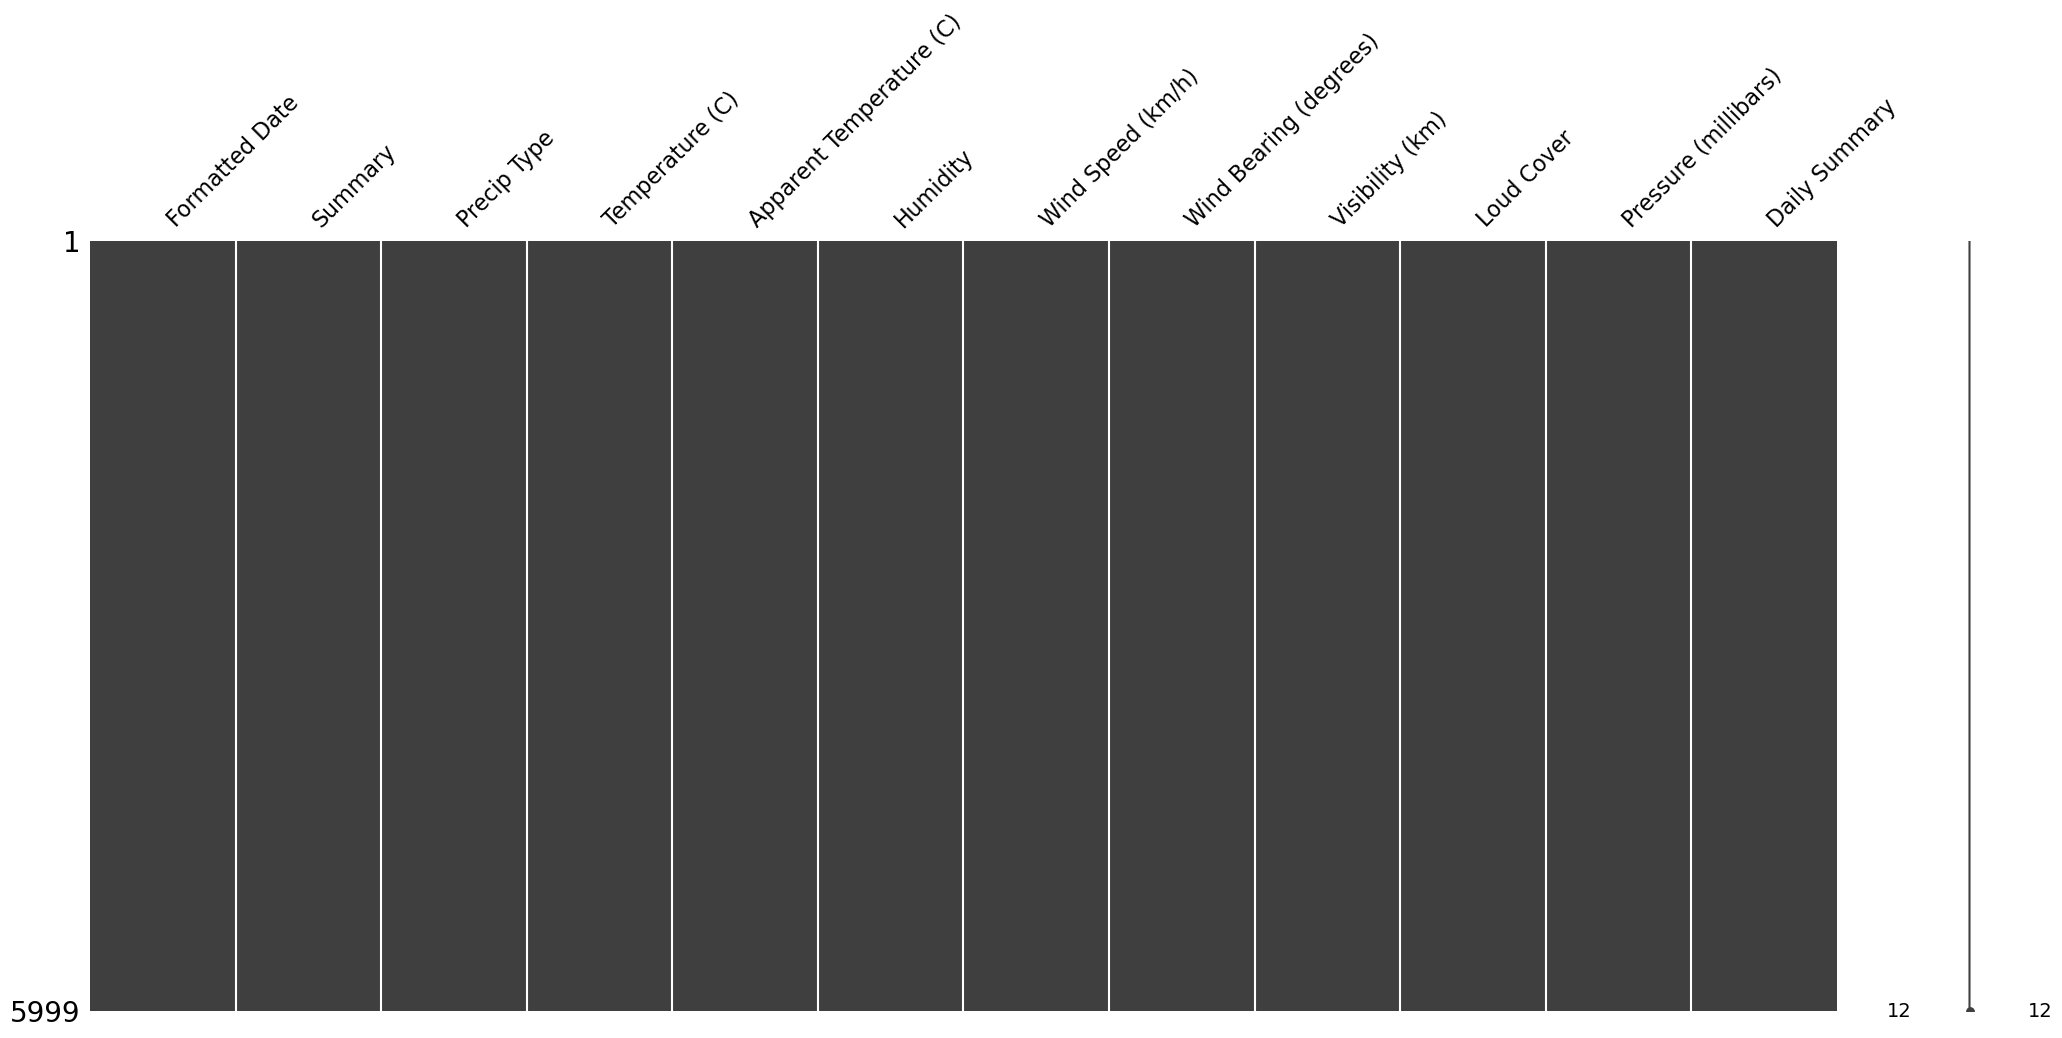

In [6]:
msno.matrix(weather_df)

Here,we can see there are no null values

In [7]:
weather_df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [8]:
weather_df.duplicated().sum()

0

In [9]:
weather_df['Formatted Date']=pd.to_datetime(weather_df['Formatted Date'],infer_datetime_format=True,utc=True)

In [10]:
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [11]:
drop_list = ["Loud Cover","Daily Summary"]

In [12]:
weather_df.drop(drop_list,axis=1,inplace=True)

In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            5999 non-null   datetime64[ns, UTC]
 1   Summary                   5999 non-null   object             
 2   Precip Type               5999 non-null   object             
 3   Temperature (C)           5999 non-null   float64            
 4   Apparent Temperature (C)  5999 non-null   float64            
 5   Humidity                  5999 non-null   float64            
 6   Wind Speed (km/h)         5999 non-null   float64            
 7   Wind Bearing (degrees)    5999 non-null   int64              
 8   Visibility (km)           5999 non-null   float64            
 9   Pressure (millibars)      5999 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(2)
memory usage: 468.8+ KB


In [14]:
weather_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),5999.0,10.217695,10.565425,-14.088889,1.094444,10.0500,18.722222,34.005556
Apparent Temperature (C),5999.0,8.958658,11.923712,-22.094444,-1.538889,10.0500,18.722222,36.400000
Humidity,5999.0,0.779488,0.173051,0.270000,0.680000,0.8300,0.920000,1.000000
Wind Speed (km/h),5999.0,10.007362,6.536619,0.000000,4.878300,9.0643,13.395200,45.933300
Wind Bearing (degrees),5999.0,190.349558,107.026792,0.000000,122.000000,190.0000,287.000000,359.000000
Visibility (km),5999.0,9.476875,4.038583,0.000000,6.906900,9.9820,11.270000,16.100000
Pressure (millibars),5999.0,997.359828,145.173638,0.000000,1012.060000,1016.8400,1022.490000,1045.140000


In [15]:
weather_df.mean()

Temperature (C)              10.217695
Apparent Temperature (C)      8.958658
Humidity                      0.779488
Wind Speed (km/h)            10.007362
Wind Bearing (degrees)      190.349558
Visibility (km)               9.476875
Pressure (millibars)        997.359828
dtype: float64

In [16]:
weather_df.median()

Temperature (C)               10.0500
Apparent Temperature (C)      10.0500
Humidity                       0.8300
Wind Speed (km/h)              9.0643
Wind Bearing (degrees)       190.0000
Visibility (km)                9.9820
Pressure (millibars)        1016.8400
dtype: float64

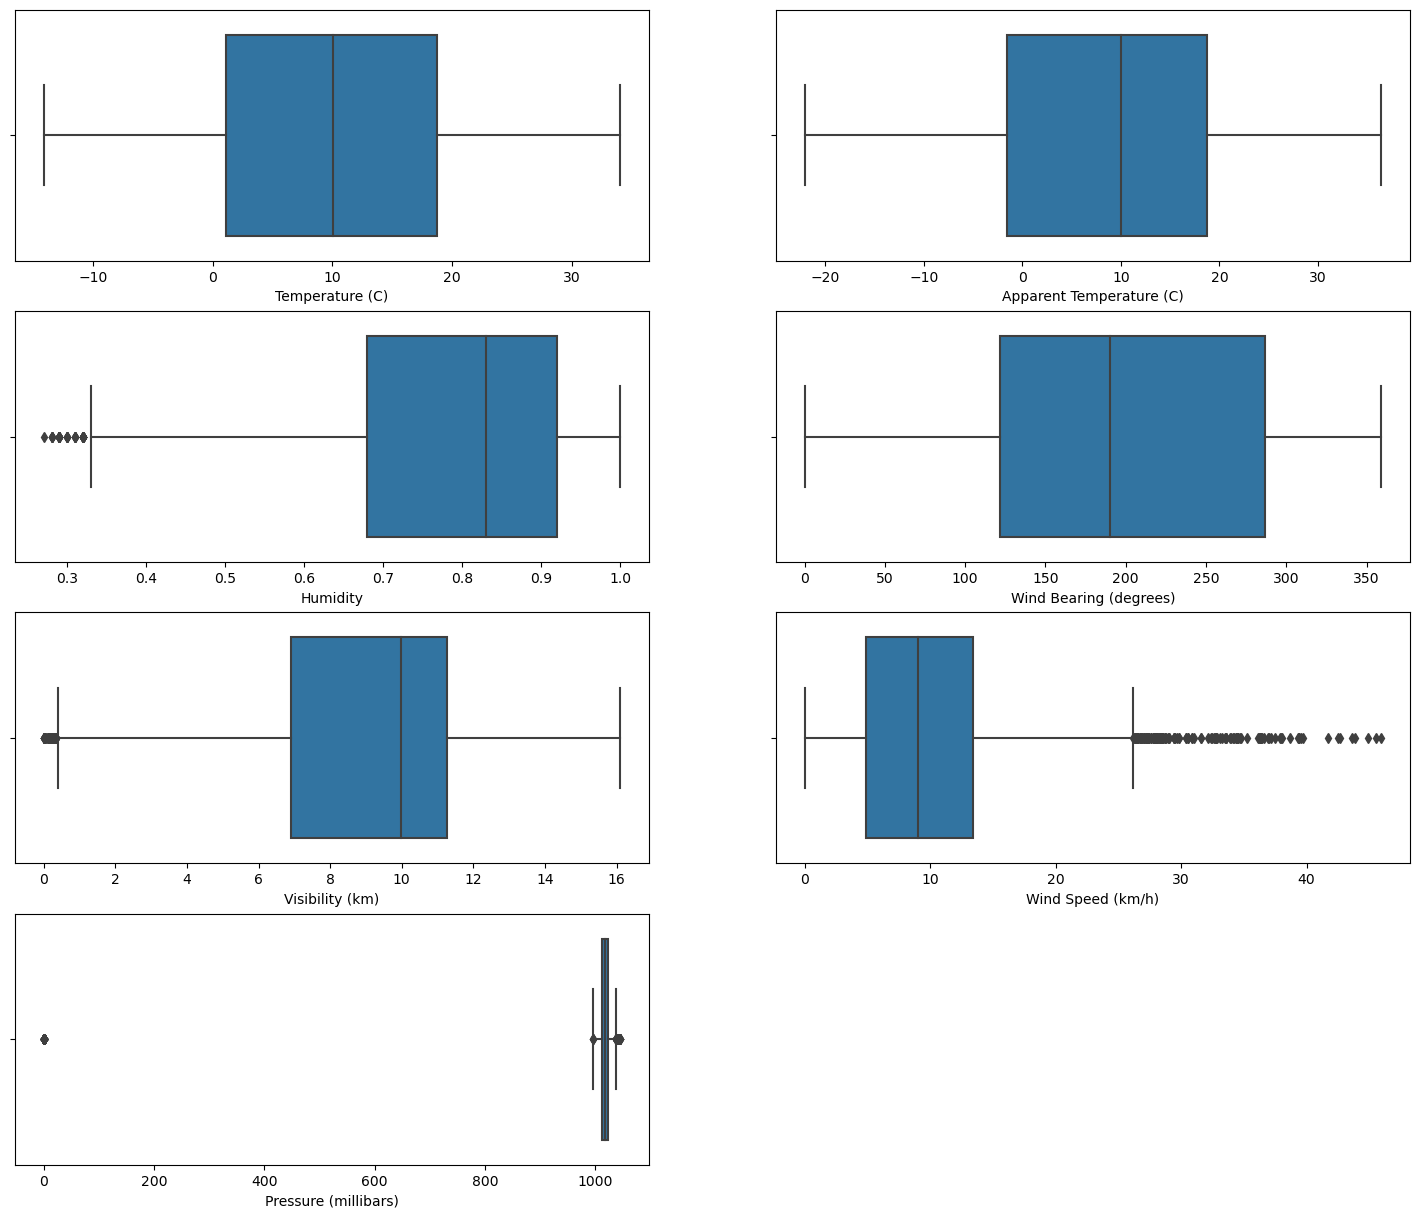

In [17]:
plt.figure(dpi=100, figsize=(18,15))

plt.subplot(421)
sns.boxplot(data=weather_df,x='Temperature (C)')
            
plt.subplot(422)
sns.boxplot(data=weather_df,x='Apparent Temperature (C)')
            
plt.subplot(423)
sns.boxplot(data=weather_df,x='Humidity')
            
plt.subplot(424)
sns.boxplot(data=weather_df,x='Wind Bearing (degrees)')

plt.subplot(425)
sns.boxplot(data=weather_df,x='Visibility (km)');

plt.subplot(426)
sns.boxplot(data=weather_df,x='Wind Speed (km/h)');

plt.subplot(427)
sns.boxplot(data=weather_df,x='Pressure (millibars)');

In [18]:
# for Humidity
Q1,Q2,Q3 =tuple(weather_df.Humidity.quantile(q=[0.25,0.5,0.75]).values)

In [19]:
print(Q1,Q2,Q3)
weather_df.Humidity.median()

0.68 0.83 0.92


0.83

In [20]:
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR
print(IQR,UL,LL,sep='\n')

0.24
1.28
0.32000000000000006


In [21]:
drop_index=weather_df[(weather_df.Humidity<LL)].index

In [22]:
weather_df=weather_df.drop(drop_index,axis=0)

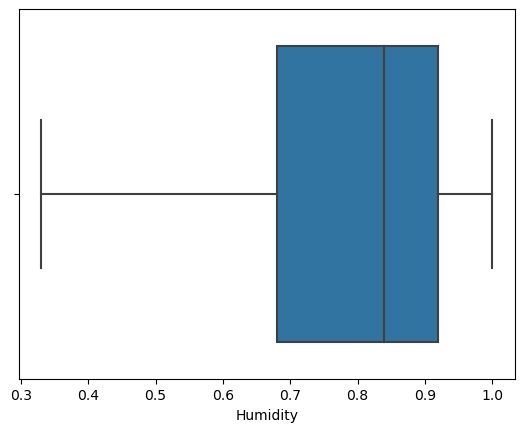

In [23]:
sns.boxplot(data=weather_df,x='Humidity');

In [30]:
# for visibility(km)
Q1,Q2,Q3 =tuple(weather_df['Visibility (km)'].quantile(q=[0.25,0.5,0.75]).values)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

drop_index=weather_df[(weather_df['Visibility (km)']<LL)].index
weather_df=weather_df.drop(drop_index,axis=0)

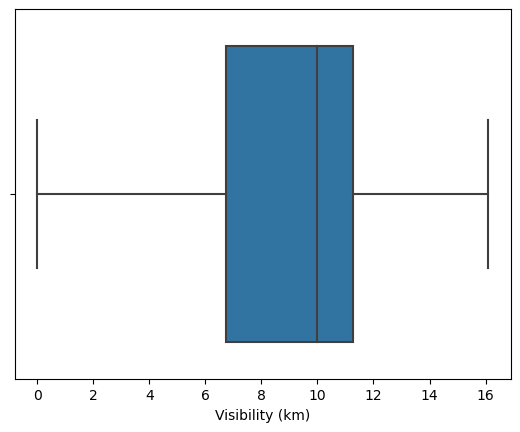

In [31]:
sns.boxplot(data=weather_df,x='Visibility (km)');

In [32]:
# wind speed(km/h)
Q1,Q2,Q3 =tuple(weather_df['Wind Speed (km/h)'].quantile(q=[0.25,0.5,0.75]).values)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

drop_index=weather_df[(weather_df['Wind Speed (km/h)']>UL)].index
weather_df=weather_df.drop(drop_index,axis=0)

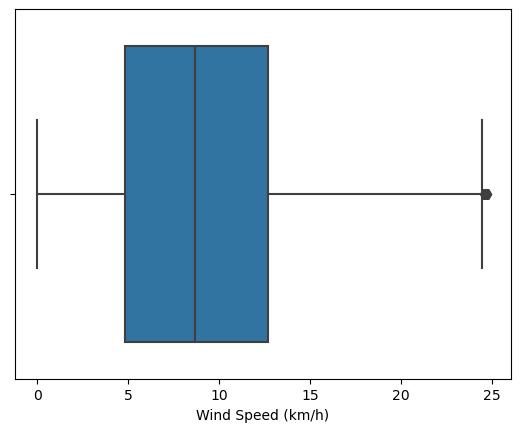

In [33]:
sns.boxplot(data=weather_df,x='Wind Speed (km/h)');

In [34]:
# Pressure (millibars)
Q1,Q2,Q3 =tuple(weather_df['Pressure (millibars)'].quantile(q=[0.25,0.5,0.75]).values)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

drop_index=weather_df[(weather_df['Pressure (millibars)']<LL)|(weather_df['Pressure (millibars)']>UL)].index
weather_df=weather_df.drop(drop_index,axis=0)

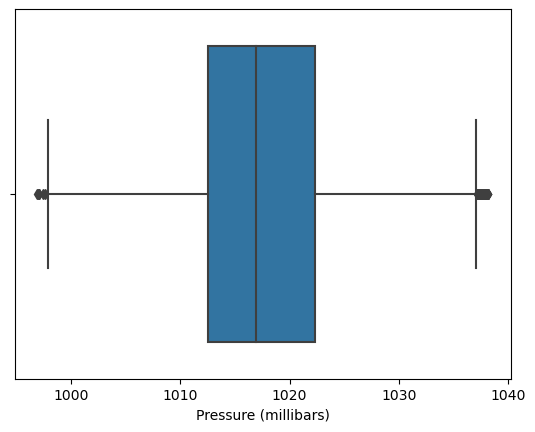

In [35]:
sns.boxplot(data=weather_df,x='Pressure (millibars)');

In [27]:
weather_df.reset_index(inplace=True)

In [28]:
weather_df.head()

,index,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [29]:
weather_df.drop("index",axis=1,inplace=True)

## Data Visualization

In [30]:
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51
...,...,...,...,...,...,...,...,...,...,...
5431,2006-05-15 17:00:00+00:00,Partly Cloudy,rain,19.094444,19.094444,0.60,6.9391,350,11.2056,1020.07
5432,2006-05-15 18:00:00+00:00,Partly Cloudy,rain,17.655556,17.655556,0.62,1.6100,56,10.3523,1020.44
5433,2006-05-15 19:00:00+00:00,Partly Cloudy,rain,15.072222,15.072222,0.78,1.9481,170,9.9820,1020.99
5434,2006-05-15 20:00:00+00:00,Partly Cloudy,rain,13.405556,13.405556,0.83,3.1073,201,15.8263,1021.50


In [31]:
weather_df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.993664,-0.548251,-0.069454,0.011867,0.433338,-0.379611
Apparent Temperature (C),0.993664,1.000000,-0.522134,-0.136108,0.019907,0.427235,-0.359716
Humidity,-0.548251,-0.522134,1.000000,-0.217725,0.054983,-0.314740,0.106697
Wind Speed (km/h),-0.069454,-0.136108,-0.217725,1.000000,-0.049193,0.059609,-0.238955
Wind Bearing (degrees),0.011867,0.019907,0.054983,-0.049193,1.000000,0.005348,-0.088932
Visibility (km),0.433338,0.427235,-0.314740,0.059609,0.005348,1.000000,-0.289151
Pressure (millibars),-0.379611,-0.359716,0.106697,-0.238955,-0.088932,-0.289151,1.000000


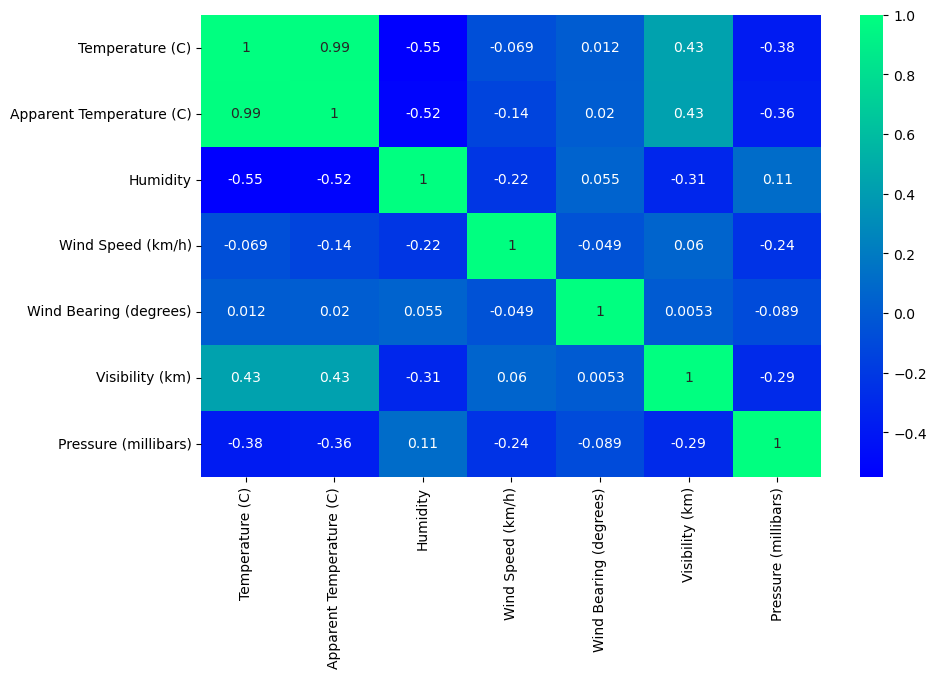

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data=weather_df.corr(),annot=True,cmap='winter');

### Here we can see Temperature is directly proportion to Apparent Temperature

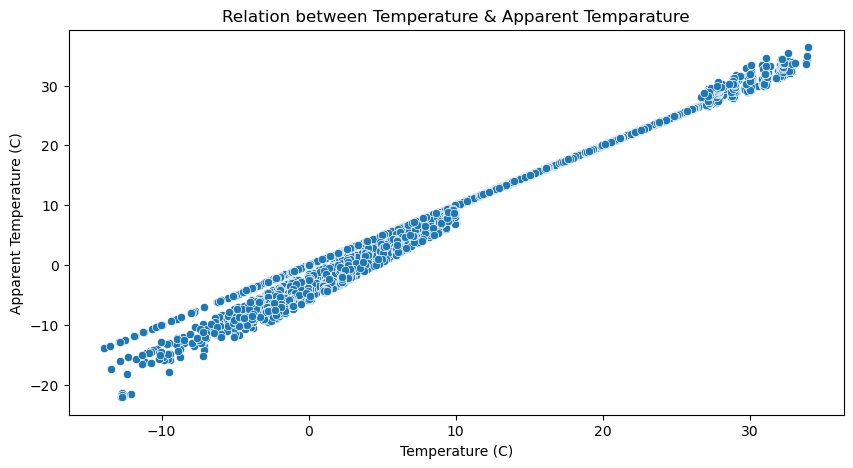

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=weather_df,x='Temperature (C)',y='Apparent Temperature (C)')
plt.title("Relation between Temperature & Apparent Temparature");

### Here,we can see that there is a linear relation between temperature and apparent temperature 

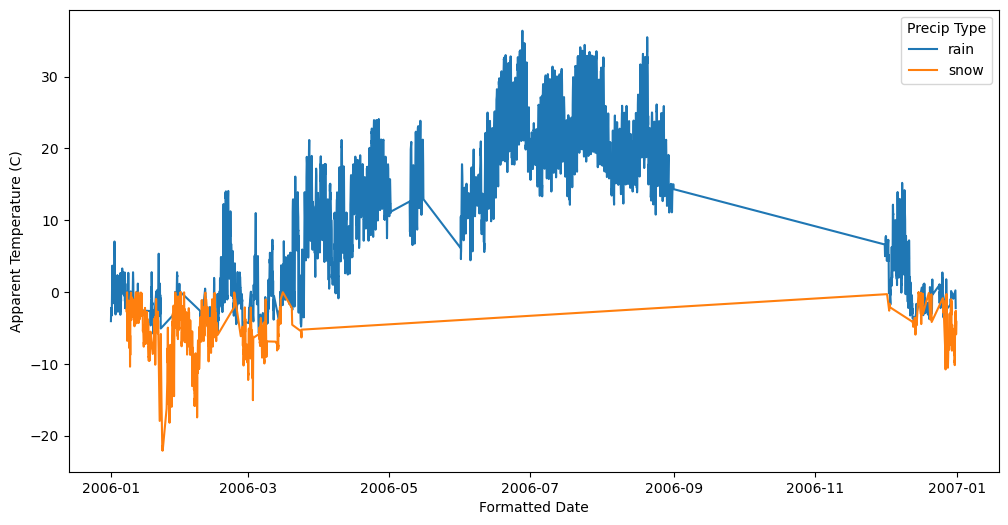

In [34]:
plt.figure(figsize=(12,6))
sns.lineplot(data = weather_df,x='Formatted Date',y='Apparent Temperature (C)',hue='Precip Type');

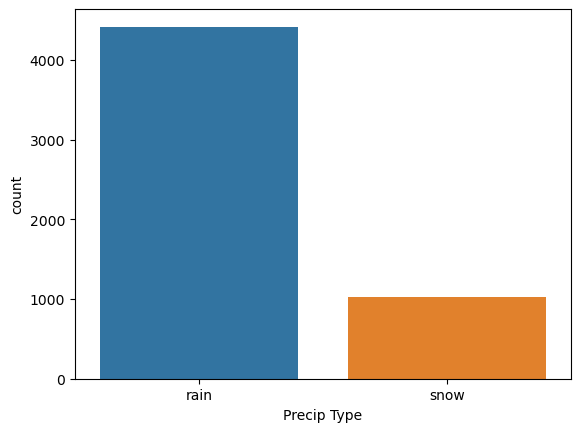

In [35]:
sns.countplot(data=weather_df,x='Precip Type');

### In precip type Rain has maximum count compared to snow 

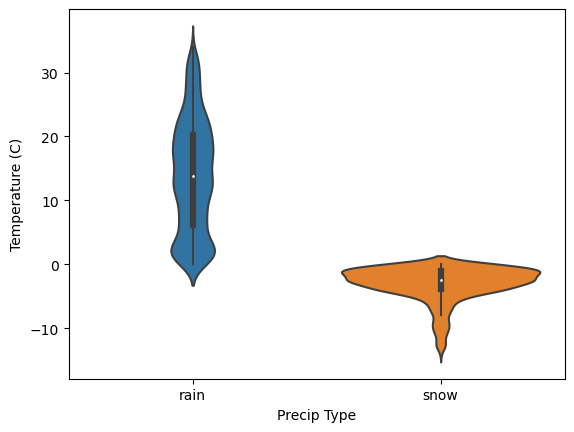

In [36]:
sns.violinplot(data=weather_df,x='Precip Type',y='Temperature (C)',ci=None);

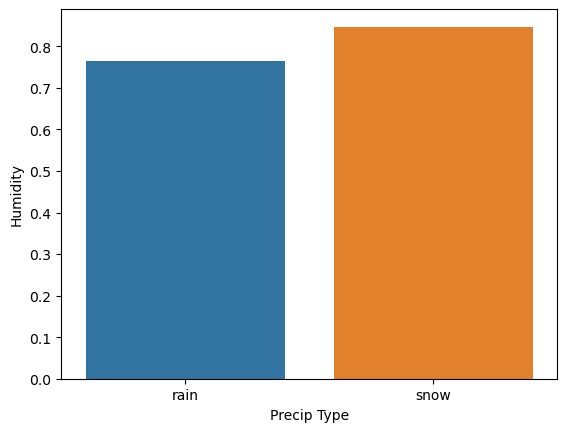

In [37]:
sns.barplot(data=weather_df,x='Precip Type',y='Humidity',ci=None);

## Identify the Target Variable and Splitting the Data into train and test

In [38]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [39]:
y=weather_df['Apparent Temperature (C)']

X=weather_df[['Formatted Date', 'Summary', 'Precip Type','Temperature (C)',
       'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)']]


In [40]:
#split data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=30,random_state=10)

In [41]:
X_train.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
413,2006-04-25 19:00:00+00:00,Mostly Cloudy,rain,16.016667,0.72,4.6046,50,9.9820,1018.31
1724,2006-12-29 05:00:00+00:00,Overcast,snow,-2.727778,0.92,9.4507,241,3.4454,1027.32
2378,2006-02-26 21:00:00+00:00,Overcast,snow,-1.061111,0.92,16.8084,289,4.8461,1010.67
5027,2006-03-26 06:00:00+00:00,Clear,rain,7.255556,0.86,8.9516,191,7.5509,1018.92
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,0.83,11.0446,259,15.8263,1016.51


In [42]:
X_test.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1302,2006-08-06 19:00:00+00:00,Partly Cloudy,rain,17.244444,0.87,1.4168,33,9.9820,1010.18
449,2006-04-27 08:00:00+00:00,Mostly Cloudy,rain,17.827778,0.73,7.4704,166,9.9820,1013.10
3978,2006-06-11 05:00:00+00:00,Foggy,rain,10.011111,0.99,8.0178,23,2.5921,1025.23
1961,2006-02-10 02:00:00+00:00,Foggy,snow,-2.733333,0.96,10.4489,161,0.1932,1010.10
3327,2006-07-12 15:00:00+00:00,Partly Cloudy,rain,27.277778,0.51,10.1752,350,10.6743,1018.23


In [43]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(5406, 9) (5406,)
(30, 9) (30,)


## Data Prerocessing on train data

## Seperating categorical & Numerical columns 

In [44]:
X_train_cat = X_train.select_dtypes(include=['object'])

In [45]:
X_train_cat.head()

,Summary,Precip Type
413,Mostly Cloudy,rain
1724,Overcast,snow
2378,Overcast,snow
5027,Clear,rain
4,Mostly Cloudy,rain


In [46]:
X_train_num = X_train.select_dtypes(include = ['number'])

In [47]:
X_train_num.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
413,16.016667,0.72,4.6046,50,9.9820,1018.31
1724,-2.727778,0.92,9.4507,241,3.4454,1027.32
2378,-1.061111,0.92,16.8084,289,4.8461,1010.67
5027,7.255556,0.86,8.9516,191,7.5509,1018.92
4,8.755556,0.83,11.0446,259,15.8263,1016.51


## Scaling the Numerical Features(Standardization)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                   columns = X_train_num.columns,
                                   index = X_train_num.index)

In [49]:
X_train_num_rescaled.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
413,0.520937,-0.361730,-0.877311,-1.334786,0.082593,0.071040
1724,-1.290985,0.825623,-0.026730,0.467486,-1.578808,1.204618
2378,-1.129877,0.825623,1.264684,0.920413,-1.222794,-0.890174
5027,-0.325951,0.469417,-0.114331,-0.004313,-0.535318,0.147786
4,-0.180954,0.291314,0.253029,0.637333,1.568032,-0.155424


## Applying OneHotEncoding on categorical columns 

In [50]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat),
                              columns = encoder.get_feature_names_out(X_train_cat.columns),
                              index = X_train_cat.index)

In [51]:
X_train_cat_ohe.head()

,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Precip Type_snow
413,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1724,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2378,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features 

In [52]:
X_train_transformed = pd.concat([X_train_cat_ohe,X_train_num_rescaled],axis=1)
X_train_transformed.head()

,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Precip Type_snow,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
413,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.520937,-0.361730,-0.877311,-1.334786,0.082593,0.071040
1724,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.290985,0.825623,-0.026730,0.467486,-1.578808,1.204618
2378,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.129877,0.825623,1.264684,0.920413,-1.222794,-0.890174
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.325951,0.469417,-0.114331,-0.004313,-0.535318,0.147786
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.180954,0.291314,0.253029,0.637333,1.568032,-0.155424


# Data preprocessing on test data

## Seperating Categorical and Numerical columns

In [53]:
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat.head()

,Summary,Precip Type
1302,Partly Cloudy,rain
449,Mostly Cloudy,rain
3978,Foggy,rain
1961,Foggy,snow
3327,Partly Cloudy,rain


In [54]:
X_test_num = X_test.select_dtypes(include=['number'])
X_test_num.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1302,17.244444,0.87,1.4168,33,9.9820,1010.18
449,17.827778,0.73,7.4704,166,9.9820,1013.10
3978,10.011111,0.99,8.0178,23,2.5921,1025.23
1961,-2.733333,0.96,10.4489,161,0.1932,1010.10
3327,27.277778,0.51,10.1752,350,10.6743,1018.23


## Scaling on Numerical features(Standardization)

In [55]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num),
                                   columns = X_test_num.columns,
                                  index = X_test_num.index)
X_test_num_rescaled.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1302,0.639619,0.528785,-1.436829,-1.495197,0.082593,-0.951823
449,0.696007,-0.302362,-0.374310,-0.240212,0.082593,-0.584448
3978,-0.059587,1.241197,-0.278231,-1.589557,-1.795690,0.941668
1961,-1.291522,1.063094,0.148473,-0.287392,-2.405416,-0.961888
3327,1.609486,-1.608451,0.100433,1.496007,0.258554,0.060975


## Applying OneHotEncoding on categorical columns 

In [56]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat),
                             columns = encoder.get_feature_names_out(X_test_cat.columns),
                             index = X_test_cat.index)
X_test_cat_ohe.head()

,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Precip Type_snow
1302,0.0,0.0,0.0,0.0,0.0,1.0,0.0
449,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3978,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3327,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [57]:
X_test_transformed = pd.concat([X_test_cat_ohe,X_test_num_rescaled],axis=1)
X_test_transformed.head()

,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Partly Cloudy,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Precip Type_snow,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
1302,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.639619,0.528785,-1.436829,-1.495197,0.082593,-0.951823
449,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.696007,-0.302362,-0.374310,-0.240212,0.082593,-0.584448
3978,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.059587,1.241197,-0.278231,-1.589557,-1.795690,0.941668
1961,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.291522,1.063094,0.148473,-0.287392,-2.405416,-0.961888
3327,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.609486,-1.608451,0.100433,1.496007,0.258554,0.060975


# Model Training 

## Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed,y_train)

LinearRegression()

In [63]:
y_test_pred = regressor.predict(X_test_transformed)

In [64]:
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
temp_df.head()

,Actual,Predicted
1302,17.244444,17.795025
449,17.827778,17.965339
3978,10.011111,9.062425
1961,-6.688889,-5.922908
3327,27.744444,27.874806


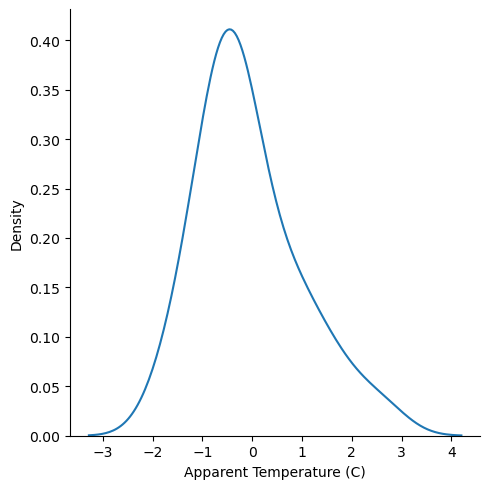

In [65]:
residual = y_test-y_test_pred
sns.displot(residual, kind='kde');

In [66]:
from sklearn import metrics
print('Mean absolute error: ',metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_test,y_test_pred))
print('Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
print('coefficient of determination: ',metrics.r2_score(y_test,y_test_pred))

Mean absolute error:  0.8053882417287537
Mean squared error:  1.0248971907667348
Root mean squared error:  1.012372061431337
coefficient of determination:  0.99410735074302


In [59]:
y_train_pred = regressor.predict(X_train_transformed)

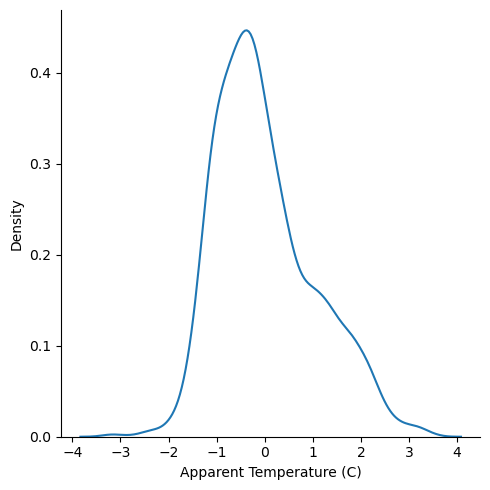

In [60]:
residual = y_train-y_train_pred
sns.displot(residual, kind='kde');

In [61]:
temp_df = pd.DataFrame({'Actual':y_train,'Predicted':y_train_pred})
temp_df.head()

,Actual,Predicted
413,16.016667,16.320505
1724,-6.388889,-5.582420
2378,-6.033333,-4.834004
5027,5.583333,5.688294
4,6.977778,7.547395


In [62]:
from sklearn import metrics
print('Mean absolute error:',metrics.mean_absolute_error(y_train,y_train_pred))
print('Mean squared error: ',metrics.mean_squared_error(y_train,y_train_pred))
print('Root mean squared error: ',np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))
print('coefficient of determination: ',metrics.r2_score(y_train,y_train_pred))

Mean absolute error: 0.8255144637735794
Mean squared error:  1.068348197493822
Root mean squared error:  1.0336093060212945
coefficient of determination:  0.9921806903698698


### As compared to train and test data, I got less error on test data i.e.,Mean absolute error 